# Analysis of portuguese students' habits that influence education

TITOLO SECONDARIO: ***How much should I study if I want to go to the bar?***
ahahaha

Michael Albarello - michael.albarello@studio.unibo.it - 0001058648

Matteo Nestola - matteo.nestola@studio.unibo.it - 0001036948

In the following notebook, we will analize how students' extracurricular habits are capable to influence their school performance. <br>In particular, we selected the [Student Alcohol Consumption Dataset](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption), which includes grade, demographic, social and school related informations that have been collected by using school reports and questionnaires. 

The dataset includes two subsets regarding the students' performances in two distinct subjects: 
- Mathematics (mat) 
- Portuguese Language (por).

Here's some explanation for each column, provided by the dataset's creator:


|Columns||Description||Type|
|:----------||:--------------||:----|
|**school**||student's school||binary:<br>'GP' - Gabriel Pereira<br>'MS' - Mousinho da Silveira|
|**sex**||student's sex||binary:<br>'F' - female<br>'M' - male|
|**age**||student's age||numeric: <br> from 15 to 22|
|**address**||student's home address type||binary: <br> 'U' - urban <br> 'R' - rural|
|**famsize**||family size||binary: <br> 'LE3' - less or equal to 3 <br> 'GT3' - greater than 3|
|**Pstatus**||parent's cohabitation status||binary: <br> 'T' - living together <br> 'A' - apart|
|**Medu**||mother's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Fedu**||father's education||numeric: <br> 0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education|
|**Mjob**||mother's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**Fjob**||father's job||nominal: <br> 'teacher' <br> 'health' care related <br> civil 'services' (e.g. administrative or police) <br> 'at_home' <br> 'other'|
|**reason**||reason to choose this school||nominal: <br> close to 'home' <br> school 'reputation' <br> 'course' preference <br> 'other'|
|**guardian**||student's guardian||nominal: <br> 'mother <br> 'father' <br> 'other'|
|**traveltime**||home to school travel time||numeric: <br> 1 - <15 min. <br> 2 - 15 to 30 min. <br> 3 - 30 min. to 1 hour <br> or 4 - >1 hour|
|**studytime**||weekly study time||numeric: <br> 1 - <2 hours <br> 2 - 2 to 5 hours <br> 3 - 5 to 10 hours <br> or 4 - >10 hours|
|**failures**||number of <u>***past***</u> class failures||numeric: <br> n if 1<=n<3 <br> else 4|
|**schoolsup**||extra educational support||binary: <br> yes <br> no|
|**famsup**||family educational support||binary: <br> yes <br> no|
|**paid**||extra paid classes within the course subject (Math or Portuguese)||binary:<br> yes <br> no|
|**activities**||extra-curricular activities||binary: <br> yes <br> no|
|**nursery**||attended nursery school||binary: <br> yes <br> no|
|**higher**||wants to take higher education||binary: <br> yes <br> no|
|**internet**||Internet access at home||binary: <br> yes <br> no|
|**romantic**||with a romantic relationship||binary: <br> yes <br> no|
|**famrel**||quality of family relationships||numeric: from 1 - very bad <br> to 5 - excellent|
|**freetime**||free time after school||numeric: <br> from 1 - very low <br> to 5 - very high|
|**goout**||going out with friends||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Dalc**||workday alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**Walc**||weekend alcohol consumption||numeric: <br> from 1 - very low <br> to 5 - very high|
|**health**||current health status||numeric: <br> from 1 - very bad <br> to 5 - very good|
|**absences**||number of school absences||numeric: <br> from 0 <br> to 93|



These grades are related with the course subject, Math or Portuguese:

|Grade|Description||Type|
|:------|:--------||:--------|
|G1|first period grade||numeric: <br>from 0 <br>to 20|
|G2 |second period grade||numeric: <br>from 0 <br>to 20|
|G3 |final grade (output target)||numeric: <br>from 0 <br>to 20)|


The goal of the following analysis is to obtain a better understanding on how do social environments affect the  curricular career of a generic student.

## 0. Imports
Let's start by importing the needed libraries and datasets:

In [1]:
import os

#---Data representation---

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

#---Pgmpy library---

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator

#---Plot Bayesian Networks---

import networkx as nx
import daft
from daft import PGM

In [2]:
#paths to datasets:

abs_path = os.getcwd()

mat_path= f'{abs_path}/dataset/student_alcohol/student-mat.csv'
por_path= f'{abs_path}/dataset/student_alcohol/student-por.csv'

#import datasets:
df1 = pd.read_csv(mat_path, sep=",")
df2 = pd.read_csv(por_path, sep=",")

#concatenate subsets:
df = pd.concat([df1, df2])

Given that the dataset's creator has provided two subsets, the first for students' performance in mathematics and the second in portuguese language, we desided to concatenate both in a single dataframe so that we were able to exploit the totality of the data. 

Let's now have a quick look at the data:

In [3]:
#Dataset's structure info
print("The imported dataset has the following structure:\n")
print(f"Number of features per individual:\t{len(df.columns)}")
print(f"Number of individuals in the dataset:\t{len(df)}")
print(f"\nColumns names:\n")

for i in range(len(df.columns)):
    print(f"{i}. {df.columns[i]}")

print("\nRepresentation of the first five individuals of the dataset:")
df.head()

The imported dataset has the following structure:

Number of features per individual:	33
Number of individuals in the dataset:	1044

Columns names:

0. school
1. sex
2. age
3. address
4. famsize
5. Pstatus
6. Medu
7. Fedu
8. Mjob
9. Fjob
10. reason
11. guardian
12. traveltime
13. studytime
14. failures
15. schoolsup
16. famsup
17. paid
18. activities
19. nursery
20. higher
21. internet
22. romantic
23. famrel
24. freetime
25. goout
26. Dalc
27. Walc
28. health
29. absences
30. G1
31. G2
32. G3

Representation of the first five individuals of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

By looking at the features of the dataset, we have seen that there is a lot of irrelevant and redundant data to drop and continuous data that has to be discretized and denoised. 

In particular, the following features will be dropped:

- `school`:  the performance of a student doesn't depend on the choice of the school;


- `romantic`: PERO' avere la ragazza toglie un sacco di tempo allo studio a quell'età (CAPIRE CON MATT)


- `famsize`: the performance of a student doesn't depend whether the family has more or less than three members;


- `guardian`: the performance of a student doesn't depend on whom his guardian is;


- `nursery`: the performance of a student doesn't depend on whether he attended nursery school or not;


- `goout`: USCIRE TUTTE LE SERE INFLUENZA IL RENDIMENTO SCOLASTICO the performance of a student doesn't depend on


- `Walc`: the performance of a student doesn't depend whether he consumes alcohol on weekends;


- `reason`: the performance of a student doesn't depend on the choice of the school, as we said earlier for the attribute `school`


- `Mjob` and `Fjob`: the performance of a student doesn't depend on his parents' job;


- `address`: the performance of a student doesn't depend on his home address;


- `higher`: the performance of a student doesn't depend whether he wants to attend college or not; 


- `activities`: the performance of a student doesn't depend on extra-curricular activities SI INVECE!! Se fai sport agonistico hai la metà del tempo.


- `internet`: the performance of a student doesn't depend on whether he has internet connection at home or not. BEH AVVOCATO...
 

In [4]:
df_new = df.drop(['school',
                  'romantic',    #!
                  'famsize',
                  'guardian',
                  'nursery',
                  'goout',       #!
                  'Walc',
                  'reason',
                  'Mjob',
                  'Fjob',
                  'address',
                  'higher',
                  'activities',  #!
                  'internet'],   #!
                  #IO TOGLIEREI ANCHE 'famrel'
                 axis=1)

Since `G1` and `G2` are intermediate grades, we decided to consider only the final grade `G3`:

In [5]:
df_new = df_new.drop(['G1','G2',], axis=1)

Then we decided to discretize the age of the students so that we could divide them in three macrogroups:

- `15-17`: students that have never failed a year;
- `18-19`: students that have failed one year;
- `20-22`: students that have failed many years of school.

In [6]:
min_age = np.min(df['age'])
max_age = np.max(df['age'])

print(f"The students' minimum age found in the dataset is: {min_age}", end = "")
print(f"\nThe students' maximum age found in the dataset is: {max_age}")


#range 15-17:
num_age15 = len(df[df['age'] == 15])
num_age16 = len(df[df['age'] == 16])
num_age17 = len(df[df['age'] == 17])

print(f"\n\nThere are: \n - {num_age15} students that are 15 years old", end = "")
print(f"\n - {num_age16} students that are 16 years old", end = "")
print(f"\n - {num_age17} students that are 17 years old")
print(f"\nMeaning that the bin '15-17' should comprehend {num_age15 + num_age16 + num_age17} students")

#range 18-19:
num_age18 = len(df[df['age'] == 18])
num_age19 = len(df[df['age'] == 19])

print(f"\n\nThere are: \n - {num_age18} students that are 18 years old", end = "")
print(f"\n - {num_age19} students that are 19 years old")
print(f"\nMeaning that the bin '20-22' should comprehend {num_age18 + num_age19} students")

#range 20-22
num_age20 = len(df[df['age'] == 20])
num_age21 = len(df[df['age'] == 21])
num_age22 = len(df[df['age'] == 22])

print(f"\n\nThere are: \n - {num_age20} students that are 20 years old", end = "")
print(f"\n - {num_age21} students that are 21 years old", end = "")
print(f"\n - {num_age22} students that are 22 years old")
print(f"\nMeaning that the bin '20-22' should comprehend {num_age20 + num_age21 + num_age22} students")

The students' minimum age found in the dataset is: 15
The students' maximum age found in the dataset is: 22


There are: 
 - 194 students that are 15 years old
 - 281 students that are 16 years old
 - 277 students that are 17 years old

Meaning that the bin '15-17' should comprehend 752 students


There are: 
 - 222 students that are 18 years old
 - 56 students that are 19 years old

Meaning that the bin '20-22' should comprehend 278 students


There are: 
 - 9 students that are 20 years old
 - 3 students that are 21 years old
 - 2 students that are 22 years old

Meaning that the bin '20-22' should comprehend 14 students


Now lets create the bins and check if some error occured by comparing the number of students in each newly created macrogroup with the numbers computed in the last cell of code:

In [7]:
df_new['age'] = pd.cut(
                       x = df_new['age'],                       #considering only the 'age' columns
                       bins = [min_age, 17, 19, max_age],       #[15-22] becomes [15-17], [18-19], [20,21]
                       labels = ["15-17","18-19", "20-22"],     #labels to assign to above bins
                       right = True,                            #include right most element (...]
                       include_lowest=True                      #include left most element  [...)
                      )

df_new['age'] = df_new['age'].astype(str)

In [8]:
#First bin check:
num_age1517 = len(df_new[df_new['age'] == "15-17"])

if num_age1517 == (num_age15 + num_age16 + num_age17):
    print("\nThe first bin has been created correctly.")
    
else:
    print("\nThe first bin has not been created correctly:")
    print(f"\n\tnum_age1517 = {num_age1517}\n\tnum_age15 + num_age16 + num_age17 = {num_age15 + num_age16 + num_age17}")
    
    
#Second bin check:
num_age1819 = len(df_new[df_new['age'] == "18-19"])

if num_age1819 == (num_age18 + num_age19):
    print("\nThe second bin has been created correctly.")
    
else:
    print("\nThe second bin has not been created correctly:")
    print(f"\n\tnum_age1819 = {num_age1819}\n\tnum_age18 + num_age19 = {num_age18 + num_age19 }")
    
#Third bin check:
num_age2022 = len(df_new[df_new['age'] == "20-22"])

if num_age2022 == (num_age20 + num_age21 + num_age22):
    print("\nThe third bin has been created correctly.")
    
else:
    print("\nThe third bin has not been created correctly:")
    print(f"\n\tnum_age2022 = {num_age2022}\n\tnum_age20 + num_age21 + num_age22 = {num_age20 + num_age21 + num_age22}")


The first bin has been created correctly.

The second bin has been created correctly.

The third bin has been created correctly.


The feauture `age` is not the only one that should be discretized. In [this article](https://www.scholaro.com/db/Countries/Portugal/Grading-System), we found out that the grade `G3` can be discretized as follows:  

|Grade||Description||Translation|
|:----------||:--------------||:-----------------|
|20.00||Muito bom con distincao e louvor||Very good with distinction and honors|
|18.00 - 19.99||Excelente||Excellent|
|16.00 - 17.99||Muito Bom||Very Good|
|14.00 - 15.99||Bom||Good|
|10.00 - 13.99||Suficiente||Sufficient|
|7.00 - 9.99||Mediocre||Poor|
|0.00 - 6.99||Mau||Poor|

In [9]:
#range mau: 
num_mau = (len(df_new[df_new['G3'] == 0]) + len(df_new[df_new['G3'] == 1]) + len(df_new[df_new['G3'] == 2]) + len(df_new[df_new['G3'] == 3]) + len(df_new[df_new['G3'] == 4]) + len(df_new[df_new['G3'] == 5]) + len(df_new[df_new['G3'] == 6]))
            
print(f"There are {num_mau} students that obtained Mau")

#range mediocre
num_med = len(df_new[df_new['G3'] == 7]) + len(df_new[df_new['G3'] == 8]) + len(df_new[df_new['G3'] == 9])
print(f"\nThere are {num_med} students that obtained Mediocre")

#range suficiente 
num_suf = len(df_new[df_new['G3'] == 10]) + len(df_new[df_new['G3'] == 11]) + len(df_new[df_new['G3'] == 12]) + len(df_new[df_new['G3'] == 13])
print(f"\nThere are {num_suf} students that obtained Suficiente")
                     
#range bom 
num_bom = len(df_new[df_new['G3'] == 14]) + len(df_new[df_new['G3'] == 15])
print(f"\nThere are {num_bom} students that obtained Bom")
                     
#range muito bom 
num_muitobom = len(df_new[df_new['G3'] == 16]) + len(df_new[df_new['G3'] == 17])
print(f"\nThere are {num_muitobom} students that obtained Muito bom")
                     
#range excelente 
num_exc = len(df_new[df_new['G3'] == 18]) + len(df_new[df_new['G3'] == 19])
print(f"\nThere are {num_exc} students that obtained Excelente")
                     
#range muito bom con distincao e louvor
num_muitobomdist = len(df_new[df_new['G3'] == 20])
print(f"\nThere are {num_muitobomdist} students that obtained Muito bom con distincao e louvor")

There are 81 students that obtained Mau

There are 149 students that obtained Mediocre

There are 520 students that obtained Suficiente

There are 172 students that obtained Bom

There are 87 students that obtained Muito bom

There are 34 students that obtained Excelente

There are 1 students that obtained Muito bom con distincao e louvor


Now lets create the bins and check if some error occured by comparing the number of students in each newly created group with the numbers computed in the last cell of code:

In [10]:
'''ordered_labels = ["Mau|Poor",
                  "Mediocre|Poor", 
                  "Suficiente|sufficient",
                  "Bom|Good",
                  "Muito Bom|Very Good",
                  "Excelente|Excellent",
                  "Muito bom con distincao e louvor|very good with distinction and honors"
                 ]'''

ordered_labels = ["Mau",
                  "Med", 
                  "Suf",
                  "Bom",
                  "Mui",
                  "Exc",
                  "Mui Dist"
                 ]

df_new['G3'] = pd.cut(x = df_new['G3'], 
                      bins = [np.min(df_new['G3']),6.99,9.99,13.99,15.99,17.99,19.99,np.max(df_new['G3'])], 
                      labels = ordered_labels,
                      right = True,
                      include_lowest = True)

df_new['G3'] = df_new['G3'].astype(str)

In [11]:
mau = len(df_new[df_new['G3'] == "Mau"])                         #|Poor"])
med = len(df_new[df_new['G3'] == "Med"])                         #iocre|Poor"])
suf = len(df_new[df_new['G3'] == "Suf"])                         #iciente|sufficient"])
bom = len(df_new[df_new['G3'] == "Bom"])                         #|Good"])
muitobom = len(df_new[df_new['G3'] == "Mui"])                    #to Bom|Very Good"])
exc = len(df_new[df_new['G3'] == "Exc"])                         #elente|Excellent"])
muitobomdist = len(df_new[df_new['G3'] == "Mui Dist"])           #to bom con distincao e louvor|very good with distinction and honors"])

if(mau == num_mau):
    print("The first bin has been created correctly.")
else:
    print("The first bin has not been created correctly:")
    print(f"mau = {mau}\nnum_mau = {num_mau}")
    
if(med == num_med):
    print("\nThe second bin has been created correctly.")
else:
    print("\nThe second bin has not been created correctly:")
    print(f"med = {med}\nnum_med = {num_med}")
    
if(suf == num_suf):
    print("\nThe third bin has been created correctly.")
else:
    print("\nThe third bin has not been created correctly:")
    print(f"suf = {suf}\nnum_suf = {num_suf}")
    
if(bom == num_bom):
    print("\nThe fourth bin has been created correctly.")
else:
    print("\nThe fourth bin has not been created correctly:")
    print(f"bom = {bom}\nnum_bom = {num_bom}")
    
if(muitobom == num_muitobom):
    print("\nThe fifth bin has been created correctly.")
else:
    print("\nThe fifth bin has not been created correctly:")
    print(f"muitobom = {muitobom}\nnum_muitobom = {num_muitobom}")
    
if(exc == num_exc):
    print("\nThe sixth bin has been created correctly.")
else:
    print("\nThe sixth bin has not been created correctly:")
    print(f"exc = {exc}\nnum_exc = {num_exc}")
    
if(muitobomdist == num_muitobomdist):
    print("\nThe seventh bin has been created correctly.")
else:
    print("\nThe seventh bin has not been created correctly:")
    print(f"muitobomdist = {muitobomdist}\nnum_muitobomdist = {num_muitobomdist}")

The first bin has been created correctly.

The second bin has been created correctly.

The third bin has been created correctly.

The fourth bin has been created correctly.

The fifth bin has been created correctly.

The sixth bin has been created correctly.

The seventh bin has been created correctly.


The last feature that should be discretized is `absences`:

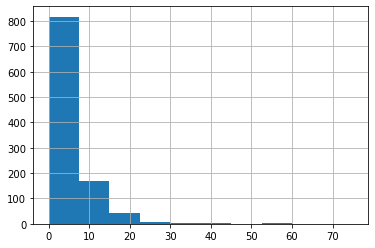

In [12]:
df_new['absences'].hist()

By looking at the previous histogram, we decided to discretize the values of `absebces` as follows:

- `0-10`
- `11-20`
- `21-30`
- `+30`



In [13]:
ordered_labels = ["0-10","11-20", "21-30", "+30"]

df_new['absences'] = pd.cut(x = df_new['absences'], 
                            bins = [np.min(df_new['absences']),10,20,30,np.max(df_new['absences'])], 
                            labels = ordered_labels,
                            right = True,
                            include_lowest = True)

df_new['absences'] = df_new['absences'].astype(str)



Let's observe the distribution of the discretized features represented on histograms and print the new dataset's structure:

/tmp/ipykernel_7346/2265592503.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


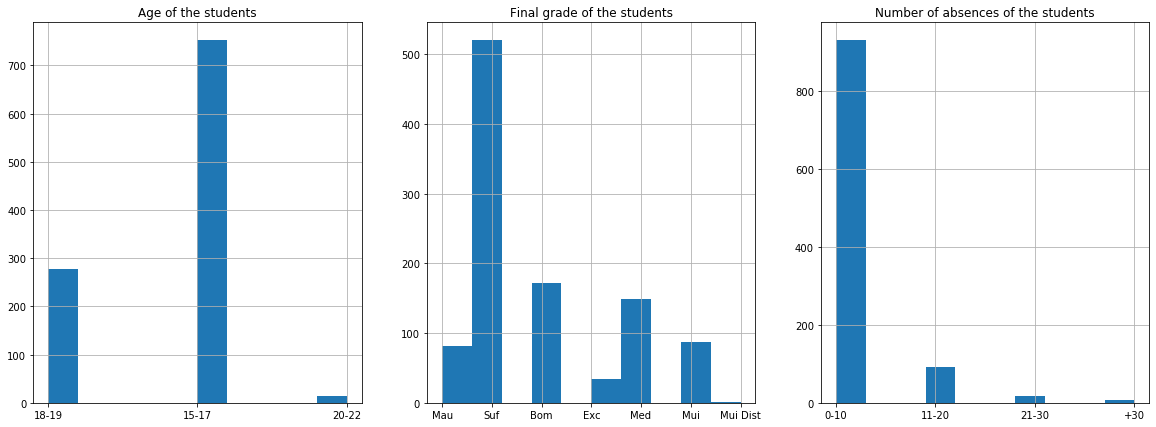

In [14]:
discretized = [df_new['age'], df_new['G3'], df_new['absences']]
titles = ["Age of the students", "Final grade of the students", "Number of absences of the students"]

fig, x = plt.subplots(1, len(discretized), figsize=(20, 7))

for i in range(len(x)):
    x[i].hist(discretized[i])
    x[i].grid(True)
    x[i].set_title(titles[i])

fig.show()

In [15]:
#Preprocessed dataset's structure info:
print("The preprocessed dataset has the following structure:\n")
print(f"Number of features per individual:\t{len(df_new.columns)}")
print(f"Number of individuals in the dataset:\t{len(df_new)}")
print(f"\nColumns names:\n")

for i in range(len(df_new.columns)):
    print(f"{i}. {df_new.columns[i]}")

print("\nRepresentation of the first five individuals of the dataset:")
df_new.head()

The preprocessed dataset has the following structure:

Number of features per individual:	17
Number of individuals in the dataset:	1044

Columns names:

0. sex
1. age
2. Pstatus
3. Medu
4. Fedu
5. traveltime
6. studytime
7. failures
8. schoolsup
9. famsup
10. paid
11. famrel
12. freetime
13. Dalc
14. health
15. absences
16. G3

Representation of the first five individuals of the dataset:


,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,famrel,freetime,Dalc,health,absences,G3
0,F,18-19,A,4,4,2,2,0,yes,no,no,4,3,1,3,0-10,Mau
1,F,15-17,T,1,1,1,2,0,no,yes,no,5,3,1,3,0-10,Mau
2,F,15-17,T,1,1,1,2,3,yes,no,yes,4,3,2,3,0-10,Suf
3,F,15-17,T,4,2,1,3,0,no,yes,yes,3,2,1,5,0-10,Bom
4,F,15-17,T,3,3,1,2,0,no,yes,yes,4,3,1,5,0-10,Suf


## 2. Data Exploration

In order to build our Bayesian Network, we must analyze the relationships between each pair of features. In this way, we are able to formulate the correct inferences. 


In our opinion, the features that directly influence the curricular performance of a students are the following:

### a. Pstatus $\rightarrow$ famrel

### b. Medu/Fedu $\rightarrow$ famsup 

### c. Dalc $\rightarrow$ studytime 

### d. traveltime $\rightarrow$ studytime 

### e. freetime $\rightarrow$ studytime 

### f. health $\rightarrow$ studytime 

### g.  $\rightarrow$ 

### a. Pstatus $\rightarrow$ 

### a. Pstatus $\rightarrow$ 

### a. Pstatus $\rightarrow$ 

### a. Pstatus $\rightarrow$ 

## 3. Bayesian Network

Given the considerations made in the previous section, we are now able to build our Bayesian network with the correct relations.

In [16]:
'''
pgm = PGM(shape=[15, 8],aspect=1.25, node_unit=1.5)

pgm.add_node(daft.Node('sex', r"sex", 1, 8))
pgm.add_node(daft.Node('age', r"age", 2, 8))
pgm.add_node(daft.Node('Medu', r"Medu", 4, 8))
pgm.add_node(daft.Node('Fedu', r"Fedu", 5, 8))
pgm.add_node(daft.Node('travelT', r"travelT", 7, 8))
pgm.add_node(daft.Node('freetime', r"freetime", 8, 8))
pgm.add_node(daft.Node('paid', r"paid", 10, 8))
pgm.add_node(daft.Node('famrel', r"famrel", 11, 8))
pgm.add_node(daft.Node('schoolSup', r"schoolSup", 12, 8))
pgm.add_node(daft.Node('Dalc', r"Dalc", 13, 8))
pgm.add_node(daft.Node('health', r"health", 14, 8))
pgm.add_node(daft.Node('absences', r"absences", 15, 8))


pgm.add_node(daft.Node('famSup', r"famSup", 5, 6))

pgm.add_node(daft.Node('studyT', r"studyT", 8, 5))

pgm.add_node(daft.Node('failures', r"failures", 12, 4))


pgm.add_node(daft.Node('Grade', r"Grade", 8, 1))

pgm.add_edge('Medu', 'famSup')
pgm.add_edge('Fedu', 'famSup')





pgm.add_edge('travelT', 'studyT')
pgm.add_edge('famSup', 'studyT')

pgm.add_edge('freetime', 'studyT')



pgm.add_edge('studyT', 'failures')
pgm.add_edge('schoolSup', 'failures')
pgm.add_edge('paid', 'failures')
pgm.add_edge('health', 'failures')
pgm.add_edge('famrel', 'failures')
pgm.add_edge('Dalc', 'failures')
pgm.add_edge('absences', 'failures')



pgm.add_edge('sex', 'Grade')
pgm.add_edge('famSup', 'Grade')
pgm.add_edge('studyT', 'Grade')
pgm.add_edge('failures', 'Grade')
pgm.add_edge('age', 'Grade')




pgm.render()
plt.show()


'''

'\n\n\npgm = PGM(shape=[15, 8],aspect=1.25, node_unit=1.5)\n\npgm.add_node(daft.Node(\'sex\', r"sex", 1, 8))\npgm.add_node(daft.Node(\'age\', r"age", 2, 8))\npgm.add_node(daft.Node(\'Medu\', r"Medu", 4, 8))\npgm.add_node(daft.Node(\'Fedu\', r"Fedu", 5, 8))\npgm.add_node(daft.Node(\'travelT\', r"travelT", 7, 8))\npgm.add_node(daft.Node(\'freetime\', r"freetime", 8, 8))\npgm.add_node(daft.Node(\'paid\', r"paid", 10, 8))\npgm.add_node(daft.Node(\'famrel\', r"famrel", 11, 8))\npgm.add_node(daft.Node(\'schoolSup\', r"schoolSup", 12, 8))\npgm.add_node(daft.Node(\'Dalc\', r"Dalc", 13, 8))\npgm.add_node(daft.Node(\'health\', r"health", 14, 8))\npgm.add_node(daft.Node(\'absences\', r"absences", 15, 8))\n\n\npgm.add_node(daft.Node(\'famSup\', r"famSup", 5, 6))\n\npgm.add_node(daft.Node(\'studyT\', r"studyT", 8, 5))\n\npgm.add_node(daft.Node(\'failures\', r"failures", 12, 4))\n\n\npgm.add_node(daft.Node(\'Grade\', r"Grade", 8, 1))\n\npgm.add_edge(\'Medu\', \'famSup\')\npgm.add_edge(\'Fedu\', \'fa

## Network

A graphical preliminary overview of the network:

- sex  
- age  
- address      
- famsize 
- Pstatus 
- Medu 
- Fedu    
- Mjob     
- Fjob     
- reason     
- guardian      
- traveltime     
- studytime   
- failures     
- schoolsup
- famsup
- paid    
- activities     
- nursery    
- higher   
- internet	               
- famrel        
- freetime                
- Dalc              
- health        
- absences



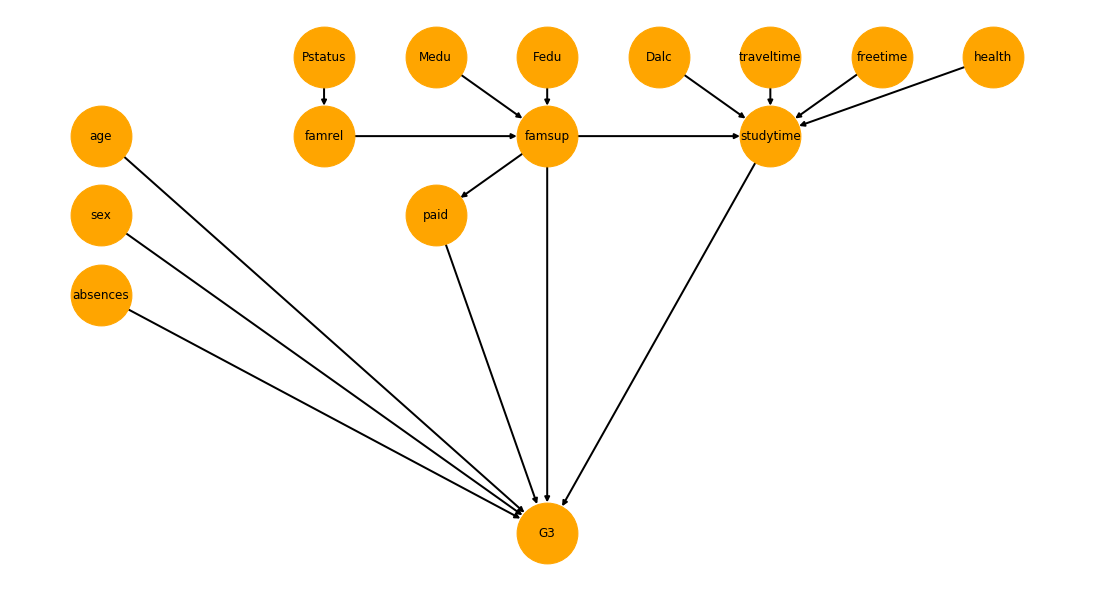

In [17]:
model = BayesianNetwork([
                        # node to famrel
                         ('Pstatus','famrel'),
    
                          # node to famsup
                         ('famrel','famsup'),
                         ('Medu','famsup'),
                         ('Fedu','famsup'),
    
                         # node to studytime
                         ('Dalc','studytime'),
                         ('famsup','studytime'),
                         ('traveltime','studytime'),
                         ('freetime','studytime'),
                         ('health','studytime'),
                        
                         # node to paid 
                         ('famsup','paid'),
                        
                        # node to G3 
                         ('sex','G3'),   
                         ('age','G3'),
                         ('paid','G3'),
                         ('famsup','G3'),
                         ('studytime','G3'),
                         ('absences','G3'),
                        

])


#Nodes Coordinates:

pos={"sex": (1,4), 
     "age": (1,5),  
     "Pstatus": (3,6),   #Non c'è nel network
     "Medu": (4,6),
     "Fedu": (5,6), 
     
     "Dalc": (6,6),
     "traveltime": (7,6),  
     "studytime": (7,5),
     "freetime": (8,6),
     "health": (9,6),
     
     "famsup": (5,5),  
     "paid": (4,4),  
     "famrel": (3,5),  
     "schoolsup": (2,4),
   
       
      
     "absences": (1,3), 
     "G3": (5,0)
     }

# Graphical options
options = {
    'node_color': 'orange',
    'node_size': 3700,
    'width': 2,
    
    
}     
        
plt.figure(figsize=(15,8))
nx.draw(model, pos=pos, with_labels=True, **options)


plt.show()

In [18]:
model.nodes()  #printa tutti i nodi

NodeView(('Pstatus', 'famrel', 'famsup', 'Medu', 'Fedu', 'Dalc', 'studytime', 'traveltime', 'freetime', 'health', 'paid', 'sex', 'G3', 'age', 'absences'))

In [19]:
model.cpds = [] #inizializzo l'array che contiene le tabular (vedere meglio)

model.fit(data=df_new,                          #usa il dataframe per allenare il modello
          estimator=BayesianEstimator, 
          prior_type="BDeu")

for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

CPT of Pstatus:
+------------+----------+
| Pstatus(A) | 0.117731 |
+------------+----------+
| Pstatus(T) | 0.882269 |
+------------+----------+ 

CPT of famrel:
+-----------+---------------------+----------------------+
| Pstatus   | Pstatus(A)          | Pstatus(T)           |
+-----------+---------------------+----------------------+
| famrel(1) | 0.06072874493927125 | 0.025391680172879523 |
+-----------+---------------------+----------------------+
| famrel(2) | 0.07692307692307693 | 0.041599135602377095 |
+-----------+---------------------+----------------------+
| famrel(3) | 0.1417004048582996  | 0.1647757968665586   |
+-----------+---------------------+----------------------+
| famrel(4) | 0.4331983805668016  | 0.49648838465694217  |
+-----------+---------------------+----------------------+
| famrel(5) | 0.2874493927125506  | 0.2717450027012426   |
+-----------+---------------------+----------------------+ 

CPT of famsup:
+-------------+-----------+-----+--------------------

In [20]:
# Checking the validity of the model 
# This method checks if the sum of the probabilities for each state is equal to 1 (tol=0.01) and if the CPDs associated with nodes are consistent with their parents.
model.check_model()   #per essere sicuri 

True

In [21]:
#Cardinality of all model nodes
model.get_cardinality()

defaultdict(int,
            {'Pstatus': 2,
             'famrel': 5,
             'famsup': 2,
             'Medu': 5,
             'Fedu': 5,
             'Dalc': 5,
             'studytime': 4,
             'traveltime': 4,
             'freetime': 5,
             'health': 5,
             'paid': 2,
             'sex': 2,
             'G3': 7,
             'age': 3,
             'absences': 4})

### Exact Inference

Exact Inference in pgmpy is implemented through the Variable Elimination Method and Belief Propagation rather than with simple enumeration; being one of the purpouses of this work exploring topics seen in class, the former is choosen.

Causal inference analyzes the response of an effect variable when a cause of the effect variable is changed.

In [22]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)  #

In [23]:
print(infer.query(["G3"],evidence={"sex": 'M',"age": '18-19'})) 

+--------------+-----------+
| G3           |   phi(G3) |
+==============+===========+
| G3(Bom)      |    0.2095 |
+--------------+-----------+
| G3(Exc)      |    0.0236 |
+--------------+-----------+
| G3(Mau)      |    0.1143 |
+--------------+-----------+
| G3(Med)      |    0.1460 |
+--------------+-----------+
| G3(Mui)      |    0.1084 |
+--------------+-----------+
| G3(Mui Dist) |    0.0135 |
+--------------+-----------+
| G3(Suf)      |    0.3848 |
+--------------+-----------+


In [24]:
print(infer.query(["G3"],evidence={"sex": 'F',"age": '18-19'})) 

+--------------+-----------+
| G3           |   phi(G3) |
+==============+===========+
| G3(Bom)      |    0.1434 |
+--------------+-----------+
| G3(Exc)      |    0.0418 |
+--------------+-----------+
| G3(Mau)      |    0.1738 |
+--------------+-----------+
| G3(Med)      |    0.1356 |
+--------------+-----------+
| G3(Mui)      |    0.0720 |
+--------------+-----------+
| G3(Mui Dist) |    0.0111 |
+--------------+-----------+
| G3(Suf)      |    0.4222 |
+--------------+-----------+


In [25]:
print(infer.query(["G3"],evidence={"Medu": 4,"Fedu": 4})) 

+--------------+-----------+
| G3           |   phi(G3) |
+==============+===========+
| G3(Bom)      |    0.1696 |
+--------------+-----------+
| G3(Exc)      |    0.0417 |
+--------------+-----------+
| G3(Mau)      |    0.0819 |
+--------------+-----------+
| G3(Med)      |    0.1270 |
+--------------+-----------+
| G3(Mui)      |    0.0931 |
+--------------+-----------+
| G3(Mui Dist) |    0.0105 |
+--------------+-----------+
| G3(Suf)      |    0.4762 |
+--------------+-----------+


In [26]:
print(infer.query(["G3"],evidence={"Medu": 1,"Fedu": 1})) 

+--------------+-----------+
| G3           |   phi(G3) |
+==============+===========+
| G3(Bom)      |    0.1727 |
+--------------+-----------+
| G3(Exc)      |    0.0411 |
+--------------+-----------+
| G3(Mau)      |    0.0818 |
+--------------+-----------+
| G3(Med)      |    0.1240 |
+--------------+-----------+
| G3(Mui)      |    0.0911 |
+--------------+-----------+
| G3(Mui Dist) |    0.0113 |
+--------------+-----------+
| G3(Suf)      |    0.4780 |
+--------------+-----------+


In [27]:
lab5= ["Mau (Poor)","Mediocre (Poor )", "Suficiente (Sufficient)","Bom (Good)","Muito Bom (Very Good)","Excelente (Excellent)","Muito bom con distincao e louvor (Very good with distinction and honors)"]


In [28]:
print(infer.query(["Dalc"],evidence={"G3": lab5[6], "sex": 'M'})) 

KeyError: 'Muito bom con distincao e louvor (Very good with distinction and honors)'

In [ ]:
print(infer.query(["Dalc"],evidence={"G3": lab5[6], "sex": 'F'})) 

is it important the family support for the student graduation?

In [ ]:
print(infer.query(["freetime"],evidence={"G3" : 'Suficiente (Sufficient)', "failures" : 0}))

Quanta probabilità ha uno studente nella fascia d'etaà media (18-19 anni), considerando che dedica mediamente dalle 5 alle 10 ore di studio, in ottimo stato di salute sia o meno rimandato.

In [ ]:
print(infer.query(["failures"],evidence={"age" : '18-19' , "studytime" : 3, "health" : 5}))

In [ ]:
print(infer.query(["failures"],evidence={"age" : '18-19' , "studytime" : 3, "health" : 5}))

In [ ]:
print("Speriamo funzioniii")

In [ ]:
print("ci siamo quasi")

PAPER:
- https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/
- https://www.brookings.edu/blog/up-front/2021/01/12/the-unreported-gender-gap-in-high-school-graduation-rates/
- https://hbr.org/2018/06/how-working-parents-can-manage-the-demands-of-school-age-kids
- https://www.scholaro.com/db/Countries/Portugal/Grading-System  
- 
- 
- 